# Mi peso

Grafica datos corporales de las básculas de VeSync.

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams['figure.facecolor']='#111111'
plt.rcParams['axes.facecolor']='#111111'

def load(filename):
    data = pd.read_csv(filename) #Lee los datos
    data['Time'] = pd.to_datetime(data['Time']).dt.date #Hace fechas
    data.drop_duplicates(subset='Time',inplace=True) #Un peso por día
    data.set_index('Time', inplace=True)
    data=data.applymap(lambda x: float(x.strip('kg %Kcal')) if type(x) == str else x) #Hace los números floats
    idx = pd.date_range(data.index.min(), data.index.max()+dt.timedelta(days=3)).date #Fechas para interpolar
    data = data.reindex(list(idx))
    data.interpolate(inplace=True)
    data = data.rolling(7, win_type='triang',center=True).mean() #Suavizar
    return data

def graphs(data,cols_to_plot=['Weight','Fat-Free Body Weight'],num_days=365):
    data_ = data.loc[data.index.max() - dt.timedelta(days=num_days) <= data.index]
    data_[cols_to_plot].plot(rot=45);

In [2]:
data = load('Export Data 1-1-2021 ~ 9-3-2021.csv')

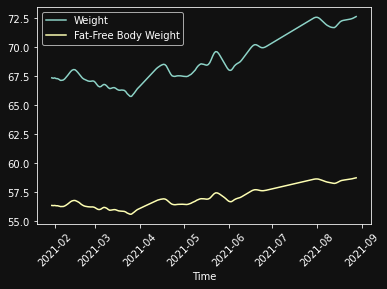

In [3]:
graphs(data)

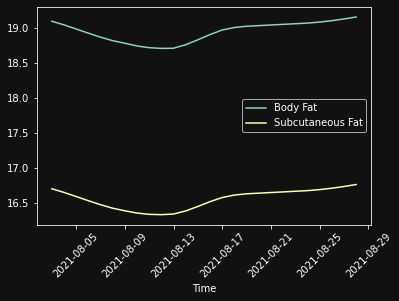

In [4]:
graphs(data,cols_to_plot=['Body Fat','Subcutaneous Fat'],num_days=28)